In [1]:
import pandas as pd
import joblib
from data_processing.main import read_scoreset
from tqdm import tqdm
from pathlib import Path
from data_processing.mapping_nbs import mapping_utils
from data_processing.mapping_nbs import plotting
pd.set_option('display.max_columns', 500)

dataset_name = "Adamovich_BRCA1_Cisplatin"
dataset_path = Path("/data/dzeiberg/mave_calibration/data/") / dataset_name

In [4]:
metadata, gene_info, gnomAD_df, spliceAI_df, clinvar_df = mapping_utils.load_mapping_data()

In [2]:
scoreset = read_scoreset(dataset_path / "scoreset.csv")

In [5]:
AUTHOR_TRANSCRIPT = scoreset.author_transcript.iloc[0].split(".")[0]

# Add ClinVar annotations

In [6]:
clinvar_hgvs_pro_summaries = mapping_utils.get_clinvar_summaries(clinvar_df,AUTHOR_TRANSCRIPT)

100%|██████████| 7254/7254 [00:03<00:00, 1993.16it/s]


In [7]:
scoreset_w_clinvar = pd.merge(scoreset.set_index("hgvs_pro"),clinvar_hgvs_pro_summaries,
                            left_index=True,
                            right_index=True,
                            how="left",
                            validate="one_to_one",
                            suffixes=("","_clinvar"))

In [8]:
scoreset_w_clinvar

,Codon,AA,variantID,FS1_BRCA1_siRNA,FS2_BRCA1_siRNA,FS3_BRCA1_siRNA,FS4_BRCA1_siRNA,score,std_BRCA1_siRNA,var_BRCA1_siRNA,FS1_control_siRNA,FS2_control_siRNA,FS3_control_siRNA,FS4_control_siRNA,FS_average_control_siRNA,std_control_siRNA,var_control_siRNA,author_transcript,synonymous,nonsense,num_p_lp,num_b_lb,num_conflicting,num_VUS,clinvar_names,clinvar_records,clinvar_spliceAI_max
hgvs_pro,,,,,,,,,,,,,,,,,,,,,,,,,,,
p.His1673Phe,1673,F,H1673F,-0.059166,0.084445,-0.354968,-0.723525,-0.263303,0.357215,0.127602,-0.067728,0.138398,-0.284475,-0.245522,-0.114832,0.193393,0.037401,NM_007294.4,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p.His1673Leu,1673,L,H1673L,-0.032594,-0.097593,-0.056029,0.257328,0.017778,0.161946,0.026226,-0.056341,0.331498,0.243071,0.254662,0.193222,0.170940,0.029220,NM_007294.4,False,False,0.0,0.0,0.0,0.0,NM_007294.4(BRCA1):c.5018A>T (p.His1673Leu),1.0,0.03
p.His1673Arg,1673,R,H1673R,0.090239,-0.045574,-0.460567,-0.301605,-0.179377,0.248061,0.061534,0.032619,-0.044663,-0.365032,-0.304399,-0.170369,0.193962,0.037621,NM_007294.4,False,False,0.0,0.0,1.0,0.0,NM_007294.4(BRCA1):c.5018A>G (p.His1673Arg),1.0,0.10
p.His1673Ser,1673,S,H1673S,-0.108307,-0.484771,-0.257177,-0.574068,-0.356081,0.212331,0.045085,0.148791,0.403217,0.446256,0.103978,0.275560,0.174111,0.030315,NM_007294.4,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p.His1673Val,1673,V,H1673V,-0.384409,-0.538518,-0.245870,-0.127388,-0.324046,0.177414,0.031476,-0.420949,-0.457211,-0.239731,-0.028200,-0.286523,0.196744,0.038708,NM_007294.4,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p.Tyr1863Pro,1863,P,Y1863P,0.165412,-0.087234,0.135075,0.315775,0.132257,0.166295,0.027654,0.081452,-0.167706,0.271782,0.284026,0.117389,0.211483,0.044725,NM_007294.4,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p.Tyr1863Gln,1863,Q,Y1863Q,-0.149693,-0.076076,-0.075183,-0.299289,-0.150060,0.105435,0.011117,-0.138901,-0.129579,-0.138725,-0.179260,-0.146616,0.022194,0.000493,NM_007294.4,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p.Tyr1863Arg,1863,R,Y1863R,-0.053896,-0.179905,-0.301797,-0.228967,-0.191141,0.104304,0.010879,0.030185,0.045558,-0.047517,-0.468567,-0.110085,0.242435,0.058775,NM_007294.4,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Add gnomAD annotations

In [9]:
Ensembl_transcript_stable_ids = mapping_utils.translate_refseq_to_ensembl(AUTHOR_TRANSCRIPT)

In [10]:
Ensembl_transcript_stable_ids

array(['ENST00000357654'], dtype=object)

In [11]:
gnomAD_info = mapping_utils.gather_gnomAD_info(gnomAD_df,Ensembl_transcript_stable_ids,[AUTHOR_TRANSCRIPT,])

In [12]:
gnomAD_info

,gnomAD_variants_maxAC_AF,gnomAD_variants_max_spliceAI_score,gnomAD_variants_VCF_INFO
hgvs_pro,,,
p.Ala102Gly,2.745220e-06,0.00,17:43104258:G:C|17:43104258:G:C
p.Ala102Val,6.863050e-07,0.00,17:43104258:G:A|17:43104258:G:A
p.Ala1039Gly,6.841430e-07,0.00,17:43092415:G:C|17:43092415:G:C
p.Ala1039Val,6.581200e-06,0.00,17:43092415:G:A|17:43092415:G:A
p.Ala1070Gly,2.736630e-06,0.00,17:43092322:G:C|17:43092322:G:C
...,...,...,...
p.Val931Leu,4.788560e-06,0.00,17:43092740:C:A|17:43092740:C:A
p.Val931Met,6.840800e-07,0.00,17:43092740:C:T|17:43092740:C:T
p.Val932Ile,6.840770e-07,0.00,17:43092737:C:T|17:43092737:C:T


In [13]:
scoreset_processed = pd.merge(scoreset_w_clinvar,gnomAD_info,
                                        left_index=True,right_index=True,how="left",validate="one_to_one").reset_index()

In [14]:
scoreset_processed.to_csv(dataset_path / "scoreset_processed.csv",index=False)

# Reload Processed

In [11]:
scoreset_processed = pd.read_csv(dataset_path / "scoreset_processed.csv")

In [16]:
def conflicting_interpretations(r):
    """
    Check if a record has conflicting interpretations
    P/LP and B/LB ; P/LP and VUS ; B/LB and VUS ; P/LP and conflicting ; B/LB and conflicting
    If data is mapped at the protein level, this could be a result of different RNA substitutions
    If data is mapped at the RNA level, this is a true conflict

    Parameters
    ----------
    r : pd.Series
        A record from the ClinVar data frame

    Returns
    -------
    bool
        True if there are conflicting interpretations, False otherwise
    """
    return r.num_p_lp > 0 and r.num_b_lb > 0 or \
            r.num_p_lp > 0 and r.num_VUS > 0 or \
            r.num_b_lb > 0 and r.num_VUS > 0 or \
            r.num_p_lp > 0 and r.num_conflicting > 0 or \
            r.num_b_lb > 0 and r.num_conflicting > 0


def is_pathogenic(r):
    return r.num_p_lp > 0 and not conflicting_interpretations(r) and r.clinvar_spliceAI_max <= .5

def is_benign(r):
    return r.num_b_lb > 0 and not conflicting_interpretations(r) and r.clinvar_spliceAI_max <= .5

def is_vus(r):
    return r.num_VUS > 0

def is_conflicting(r):
    return r.num_conflicting > 0

def is_gnomAD(r):
    return r.gnomAD_variants_maxAC_AF > 0 and r.gnomAD_variants_max_spliceAI_score <= .5

def is_synonymous(r):
    return r.synonymous and r.num_p_lp == 0 and r.clinvar_spliceAI_max <= .5


In [17]:
sample_data = {
    "P/LP" : scoreset_processed[scoreset_processed.apply(lambda r: not r.nonsense and is_pathogenic(r),axis=1)],
    "B/LB" : scoreset_processed[scoreset_processed.apply(lambda r: not r.nonsense and is_benign(r),axis=1)],
    'gnomAD': scoreset_processed[scoreset_processed.apply(lambda r: not r.nonsense and is_gnomAD(r),axis=1)],
}

In [18]:
for sample_name, sample in sample_data.items():
    print(f"{sample_name}: {sample.shape[0]}")

P/LP: 43
B/LB: 22
gnomAD: 108


(<Figure size 1200x900 with 3 Axes>,
 array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>], dtype=object))

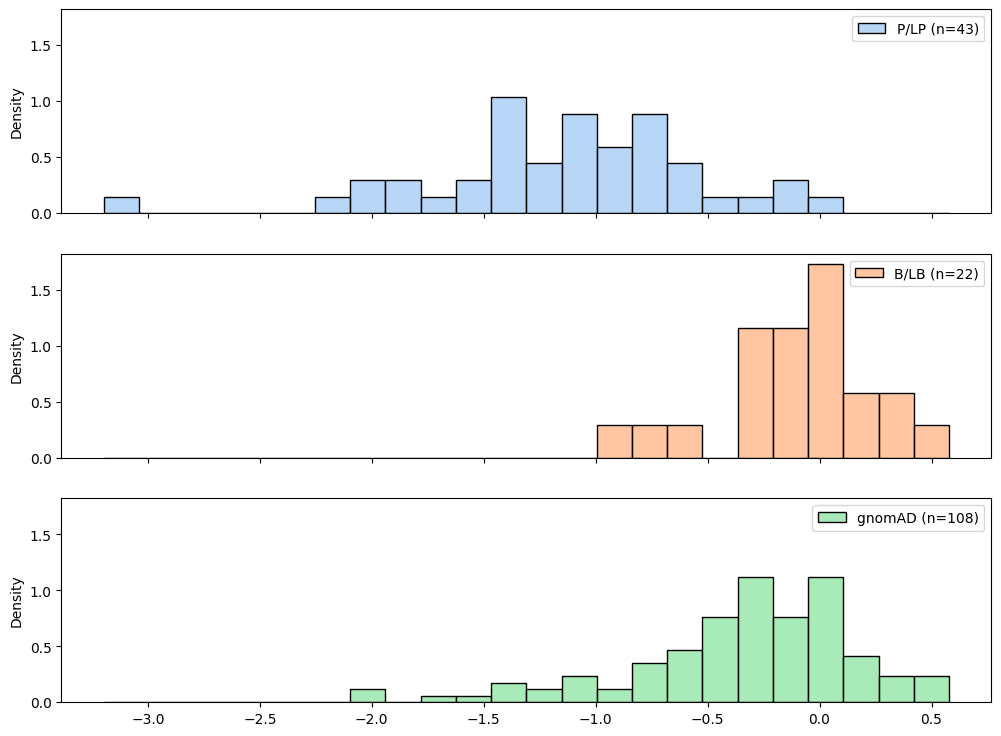

In [19]:
plotting.plot_samples({k : v.score.values for k,v in sample_data.items()})

In [20]:
pd.DataFrame.from_records([*[dict(sample_name='P/LP',score=score) for score in sample_data['P/LP'].score.values],
                            *[dict(sample_name='B/LB',score=score) for score in sample_data['B/LB'].score.values],
                            *[dict(sample_name='gnomAD',score=score) for score in sample_data['gnomAD'].score.values]]).to_csv(dataset_path / "samples.csv",index=False)